In [1]:
import pandas_datareader.data as web
import datetime

In [2]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2020,7,1)

In [3]:
facebook = web.DataReader('FB','yahoo',start,end)
facebook.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,117.839996,115.510002,116.029999,116.860001,20663900,116.860001
2017-01-04,119.660004,117.290001,117.550003,118.690002,19630900,118.690002
2017-01-05,120.949997,118.320000,118.860001,120.669998,19492200,120.669998
2017-01-06,123.879997,120.029999,120.980003,123.410004,28545300,123.410004
2017-01-09,125.430000,123.040001,123.550003,124.900002,22880400,124.900002


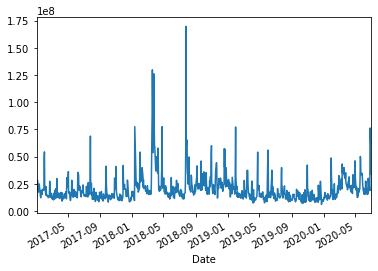

In [4]:
facebook['Volume'].plot()

### Quandl

In [5]:
import quandl # Python API

In [6]:
mydata = quandl.get('EIA/PET_RWTC_D') # oil price
mydata

,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2020-07-14,40.30
2020-07-15,41.20
2020-07-16,40.74


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

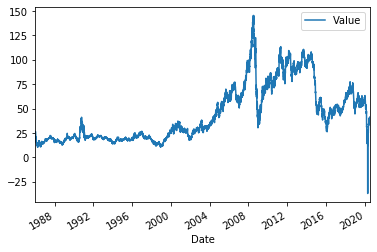

In [8]:
mydata.plot()

In [9]:
appl = quandl.get("WIKI/AAPL")
appl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


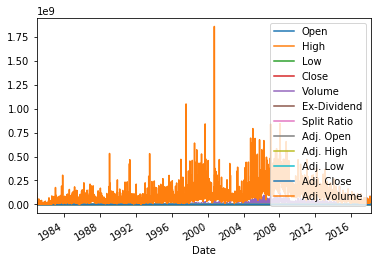

In [10]:
appl.plot()

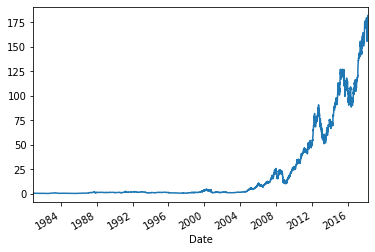

In [11]:
appl['Adj. Close'].plot()

## Time Series with Pandas

### Datetime Index

In [12]:
import numpy as np
import pandas as pd

In [13]:
from datetime import datetime

In [14]:
first_two = [datetime(2016,1,1),datetime(2016,1,2)]
dt_ind = pd.DatetimeIndex(first_two)
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [15]:
data = np.random.randn(2,2)
cols = ['a','b']
df = pd.DataFrame(data,dt_ind,cols)
df

,a,b
2016-01-01,0.825950,0.526384
2016-01-02,-1.438678,-1.382365


In [16]:
df.index.max()

Timestamp('2016-01-02 00:00:00')

In [17]:
df.index.argmax()

1

In [18]:
df = pd.read_csv('walmart_stock.csv',index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


### Time Resampling

In [19]:
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
# df.resample(rule='Q').mean()
# df.resample(rule='A').max()
# df['Close'].resample('M').mean().plot(kind='bar',figsize=(16,6))

### Time Shifting

In [20]:
# df.shift(periods=-1).tail()
# df.tshift(freq='M').head()

### Pandas Rolling and Expanding
use pandas built-in rolling methods to create things like a rolling mean (Moving Average) based off a given time period

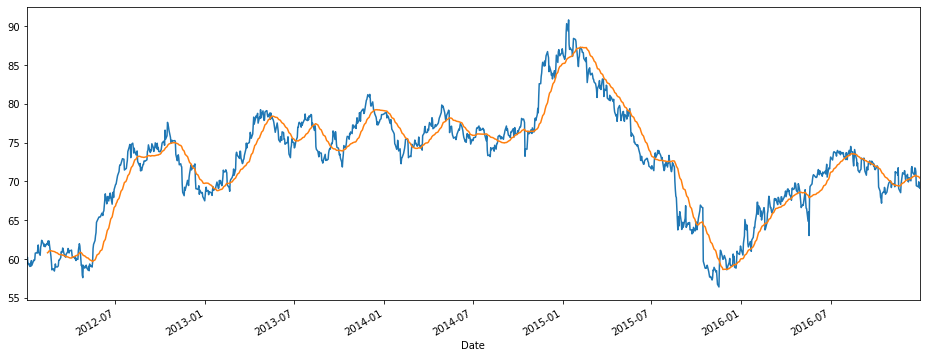

In [21]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot(figsize=(16,6))

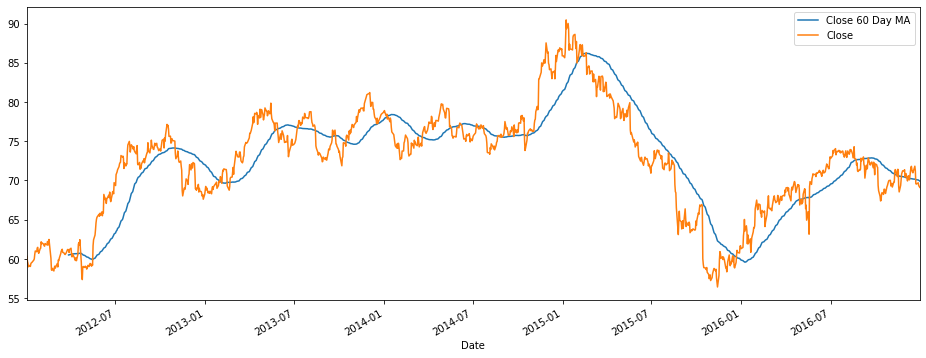

In [22]:
df['Close 60 Day MA'] = df['Close'].rolling(window=60).mean()
df[['Close 60 Day MA','Close']].plot(figsize=(16,6))

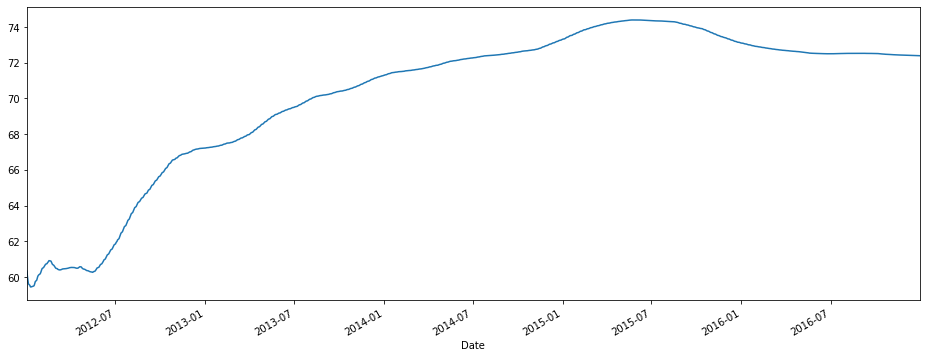

In [23]:
df['Close'].expanding().mean().plot(figsize=(16,6)) #expanding mean

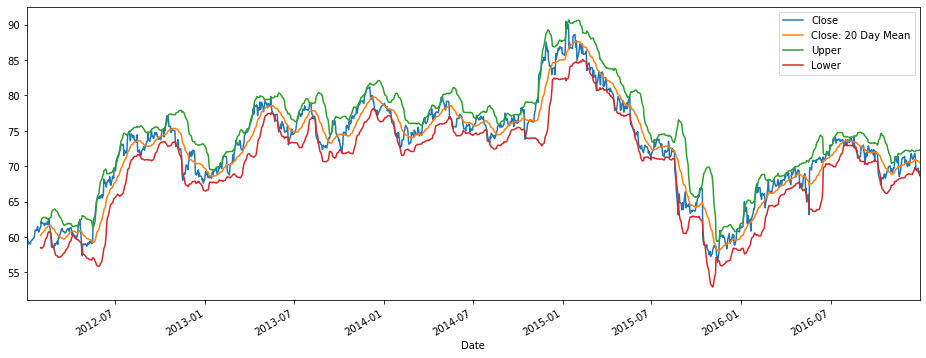

In [24]:
# bollinger band
# Close 20 MA
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()
# Upper = 20MA + 2*std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['Close'].rolling(20).std())
# Lower = 20MA - 2*std(20)
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['Close'].rolling(20).std())

df[['Close','Close: 20 Day Mean','Upper','Lower']].plot(figsize=(16,6))